In [2]:
import pandas as pd
import ewtpy
import pywt
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('data.csv')
print(df.to_string())
data = df.to_numpy()
temp = df['temp'].to_numpy()
humidity = df['humidity'].to_numpy()
windspeed = df['windspeed'].to_numpy()
solar_radiation = df['solarradiation'].to_numpy()
precipitation = df['precip'].to_numpy()
print(data)

     temp  feelslike   dew  humidity  precip  precipprob  snow  snowdepth  windgust  windspeed  winddir  sealevelpressure  cloudcover  visibility  solarradiation  solarenergy  uvindex  severerisk
0    24.0       24.0  23.0     94.15   0.000           0     0          0      29.9       12.1    120.0            1011.5       100.0         6.0               0          0.0        0          10
1    24.3       24.3  22.9     91.70   0.000           0     0          0      26.3        3.5    111.0            1011.2        96.3         8.3               0          0.0        0          10
2    24.0       24.0  23.0     94.15   0.000           0     0          0      23.4       10.3     90.0            1011.0        89.0         5.5               0          0.0        0          10
3    24.0       24.0  23.0     94.15   0.000           0     0          0      19.8        8.5     85.0            1011.0        89.0         5.5               0          0.0        0          10
4    24.0       24.0

In [4]:
def decompose_to_ewt(data):
    temp_data,  mfb ,boundaries = ewtpy.EWT1D(data, N = 5)
    return temp_data, mfb, boundaries
def split_mode(ewt):
    modes = [[],[],[],[],[]]
    for i in range(5):
        modes[i] = [m for m in ewt[:,i]]
    return modes
print(temp)

[24.  24.3 24.  24.  24.  23.5 23.  24.  24.5 25.5 26.2 27.  27.  26.9
 27.  27.  26.7 25.  24.5 24.9 24.  24.  24.1 24.  23.5 23.7 23.  23.
 23.6 23.  23.  23.9 24.  24.5 25.2 26.  27.  26.8 26.  26.  26.4 25.5
 25.  24.8 24.5 24.  23.4 22.  22.5 22.7 23.  23.  23.  23.  23.  22.5
 24.  24.5 25.4 26.5 27.  27.4 28.  28.  27.6 26.5 25.5 24.7 24.  23.5
 23.9 23.  23.5 22.9 22.  22.  21.1 21.5 21.  22.6 23.  24.  25.9 27.5
 28.5 29.7 30.  29.5 29.  27.5 26.5 25.6 25.  24.  23.9 23.  23.5 23.4
 22.5 22.5 22.9 23.  23.  23.2 24.  24.  25.4 26.  27.  28.2 28.5 28.5
 29.1 28.  26.5 25.7 24.5 24.  24.3 24.  24.  23.9 24.  24.  23.7 23.
 23.  23.6 23.5 23.5 23.9 19.5 20.  19.6 18.5 17.5 17.8 15.5 15.  16.
 15.  15.  14.4 14.  14.  13.7 13.  13.  13.  13.  13.  12.7 13.  13.
 14.  15.  15.  15.8 15.  16.  15.7 14.5 14.  14.2 13.  13.  13.9 13.
 13.  13.5 13.  13.  13.7 13.  13.  13.7 14.  15.  15.5 15.5 16.  16.9
 16.  17.  17.4 16.  16.  15.9 16.  15.5 15.9 15.  13.5 14.1 13.  12.
 12.7 12.  1

(4, 768, 5)


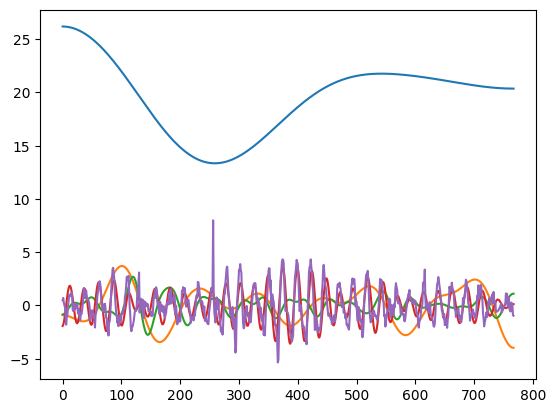

In [5]:
temp_ewt,_,_ = decompose_to_ewt(temp)
plt.plot(temp_ewt)
windspeed_ewt,_,_ = decompose_to_ewt(windspeed)
solar_radiation_ewt,_,_ = decompose_to_ewt(solar_radiation)
precipitation_ewt,_,_ = decompose_to_ewt(precipitation)
humidity_ewt,_,_ = decompose_to_ewt(humidity)
data_ewt = [temp_ewt, windspeed_ewt, solar_radiation_ewt, precipitation_ewt]
print(np.shape(data_ewt))

In [ ]:
X = np.array(data_ewt)
y = np.array(humidity_ewt)
print(X.shape)
print(y.shape)
X = np.transpose(X,(1,2,0))
# y = np.transpose(y)
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=False
)
print(X_train.shape)
print(y_train.shape)
print(X)


In [53]:
model = Sequential(
    [
        tf.keras.Input(shape=(5,4,)),
        tf.keras.layers.Dense(units = 25, activation = "relu"),
        tf.keras.layers.Dense(units = 15, activation = "relu"),
        tf.keras.layers.Dense(units = 5, activation = "relu"),
        tf.keras.layers.Dense(units = 1, activation = "linear")
        ### END CODE HERE ### 
    ], name = "my_model" 
) 

model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
)

model.fit(
    X_train,y_train,
    epochs=500,   
) 

Epoch 1/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 842.4774
Epoch 2/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 687.5557 
Epoch 3/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 654.2329 
Epoch 4/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 583.2877 
Epoch 5/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 438.4964 
Epoch 6/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 310.5710 
Epoch 7/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 179.5961 
Epoch 8/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 103.4953 
Epoch 9/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 71.2587 
Epoch 10/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 63.8353 
Epoch 11/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60.3126 
Epoch 12/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56.9505 
Epoch 13/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 57.7064 
Epoch 14/500
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 55.6387 
Epoch 15/500
17/17 ━━━━━━━━━━━━━━━━━

(768, 5, 4)
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
[[[80.15961   ]
  [-4.945846  ]
  [-3.7162585 ]
  [ 2.4054708 ]
  [-2.0209956 ]]

 [[80.21808   ]
  [-4.926869  ]
  [-3.4443603 ]
  [ 0.52443653]
  [-1.0311255 ]]

 [[80.28055   ]
  [-4.9242244 ]
  [-3.2473407 ]
  [-1.2071123 ]
  [-2.557386  ]]

 ...

 [[ 8.154711  ]
  [ 3.13362   ]
  [-2.3485453 ]
  [-1.1571987 ]
  [ 0.8262504 ]]

 [[ 8.1254225 ]
  [ 3.0534797 ]
  [-2.18043   ]
  [-1.2103515 ]
  [ 4.2790294 ]]

 [[ 8.1156645 ]
  [ 3.0290213 ]
  [-2.122506  ]
  [-1.223139  ]
  [ 4.2208743 ]]]
0
[[80.15961  ]
 [-4.945846 ]
 [-3.7162585]
 [ 2.4054708]
 [-2.0209956]]
[80.15961   80.21808   80.28055   80.34686   80.41695   80.490616
 80.567795  80.64832   80.732086  80.81895   80.90877   81.00143
 81.09678   81.194695  81.29503   81.39764   81.502396  81.60918
 81.717804  81.82815   81.940094  82.05349   82.168175  82.28401
 82.40088   82.518616  82.637085  82.75615   82.87565   82.995476
 83.115456  83.23544   83.35532   83.474945  83.5941

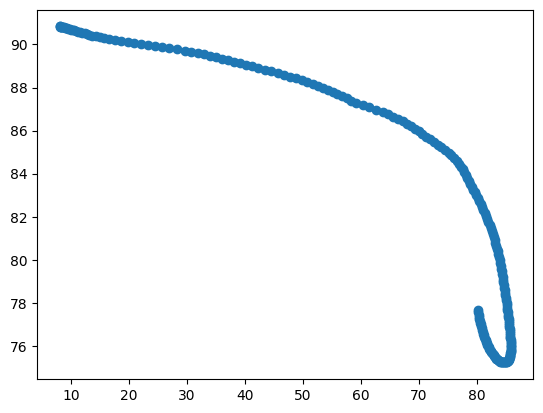

In [57]:
# print(X)
print(X.shape)
y_predict = model.predict(X_test)
print(y_predict)
print(0)
print(y_predict[0])
print(y_predict[:,0,0])
print(y_test[:,0])
plt.scatter (y_predict[:,0,0],y_test[:,0])
for i in range(len(y_predict)):
    print(f"predict: {y_predict[i, 0,0]}, test: {y_test[i, 0]}")
print(y_predict[:,0,0])
print(np.corrcoef(y_predict[:,0,0],y_test[:, 0]))
print(mean_squared_error(y_predict[:, 0,0], y_test[:, 0]))